# Costs Sensitivity Analysis

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
from cycler import cycler

import fiona
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import collections
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point, Polygon

%matplotlib inline

sns.color_palette()

sns.set_style("whitegrid", {"xtick.direction": "in","ytick.direction": "in"})

### Setup all file scenarios

The files I am going to load are the ones showed in the table below. This is to know which file correspond to what. I have not added the dates in the file name since they are autogenerated and it is a sanity check for me, but in reality the dates (numbers in front of the file name scenario) don't matter.
![scenarios_info.png](scenarios_info_cost.png)

In [24]:
cwd = os.getcwd()

In [25]:
facility_label = ['Manufacturing', 'Recycling', 'Manufacturing_cap', 'Recycling_cap']
location_label = ['NAICS', '40209']
factor_label_rec = ['05', '1', '2', '5', '10']
factor_label_man = ['0001','05', '1', '2'] # 0 is 0,5

In [26]:
files_list = []
for fac in facility_label:
    for loc in location_label:
        if fac.startswith('Manufacturing'):
            for fac_man in factor_label_man:
                files_list.append(fac+'_'+loc+'_'+fac_man)
        else:
            for fac_rec in factor_label_rec:
                files_list.append(fac+'_'+loc+'_'+fac_rec) 

#### Group the files into smaller bins for easier handling

In [27]:
recycling_files = [x for x in files_list if x.startswith('Recycling')]
recycling_files_cap = [x for x in recycling_files if "cap" in x]
recycling_files_cost = [x for x in recycling_files if "cap" not in x]

#### Dictionary to change year number to actual years

In [28]:
year_list = list(range(2025, 2051, 1))
number_year = list(range(1, 27, 1))
years_dict = dict(zip(number_year,year_list))


### Load Recycling files

#### Cost files

In [29]:
for files in recycling_files_cost:
    testfile_path = glob.glob(os.path.join(cwd, "scenarios", files, 'plants.csv'))[0]
    globals()['%s_plants' % (files)] = pd.read_csv(testfile_path) 
    globals()['%s_plants' % (files)] = globals()['%s_plants' % (files)].replace({"year": years_dict})
    print('{}: {} locations'.format(files, len(globals()['%s_plants' % (files)]['location name'].unique())))

Recycling_NAICS_05: 81 locations
Recycling_NAICS_1: 81 locations
Recycling_NAICS_2: 81 locations
Recycling_NAICS_5: 81 locations
Recycling_NAICS_10: 81 locations
Recycling_40209_05: 81 locations
Recycling_40209_1: 81 locations
Recycling_40209_2: 81 locations
Recycling_40209_5: 81 locations
Recycling_40209_10: 81 locations


#### Capacity files

In [30]:
rec_cap_locs_data = []
for files in recycling_files_cap:
    testfile_path = glob.glob(os.path.join(cwd, "scenarios", files, 'plants.csv'))[0]
    globals()['%s_plants' % (files)] = pd.read_csv(testfile_path)
    globals()['%s_plants' % (files)] = globals()['%s_plants' % (files)].replace({"year": years_dict})
    print('{}: {} locations'.format(files, len(globals()['%s_plants' % (files)]['location name'].unique())))    

Recycling_cap_NAICS_05: 161 locations
Recycling_cap_NAICS_1: 81 locations
Recycling_cap_NAICS_2: 41 locations
Recycling_cap_NAICS_5: 17 locations
Recycling_cap_NAICS_10: 10 locations
Recycling_cap_40209_05: 161 locations
Recycling_cap_40209_1: 81 locations
Recycling_cap_40209_2: 41 locations
Recycling_cap_40209_5: 17 locations
Recycling_cap_40209_10: 9 locations


In [31]:
rec_cap_locs_data = [['Capacity', 0.5, 161], 
                     ['Capacity',1, 81], 
                     ['Capacity',2, 41],
                     ['Capacity',5, 17],
                     ['Capacity',10, 10],
                     ['Cost', 0.5, 81], 
                     ['Cost',1, 81], 
                     ['Cost',2, 81],
                     ['Cost',5, 81],
                     ['Cost',10, 81],]
rec_cap_locs_data_df = pd.DataFrame(rec_cap_locs_data, columns=['Analysis', 'Factor', 'Locations'])

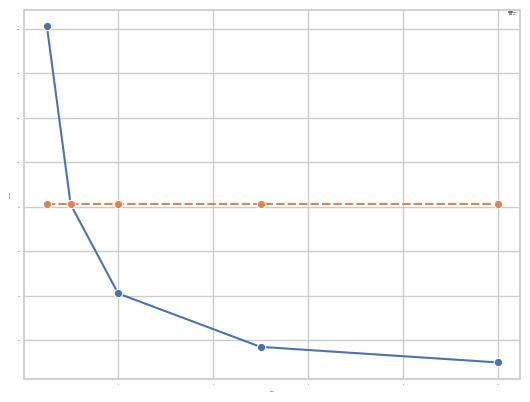

In [32]:
figure = sns.lineplot(x='Factor', y='Locations', data=rec_cap_locs_data_df, marker='o', hue='Analysis', style="Analysis")
figure.legend(frameon=False)

In [33]:
Recycling_NAICS_05_plants.keys()

Index(['plant type', 'location name', 'year', 'latitude (deg)',
       'longitude (deg)', 'capacity (tonne)', 'amount processed (tonne)',
       'amount received (tonne)', 'amount in storage (tonne)',
       'utilization factor (%)', 'energy (GJ)', 'opening cost ($)',
       'expansion cost ($)', 'fixed operating cost ($)',
       'variable operating cost ($)', 'storage cost ($)', 'total cost ($)'],
      dtype='object')

In [ ]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(Recycling_NAICS_05_plants, col="location name",
                     col_wrap=9, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")


grid.map(plt.plot, "year", "utilization factor (%)")

# Adjust the tick positions, labels and 
#sns.set(font_scale=0.1)
grid.set_titles(row_template = '{row_name}', col_template = '{col_name}', size=5)

grid.fig.tight_layout(w_pad=1)
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('ONE TITLE FOR ALL')


#plt.savefig(f"figures/Recycling_NAICS_05_plants.png);



Text(0.5, 0.98, 'ONE TITLE FOR ALL')